#### Data and libraries importing

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [27]:
df = pd.read_csv('dataset/movie_metadata.csv')
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

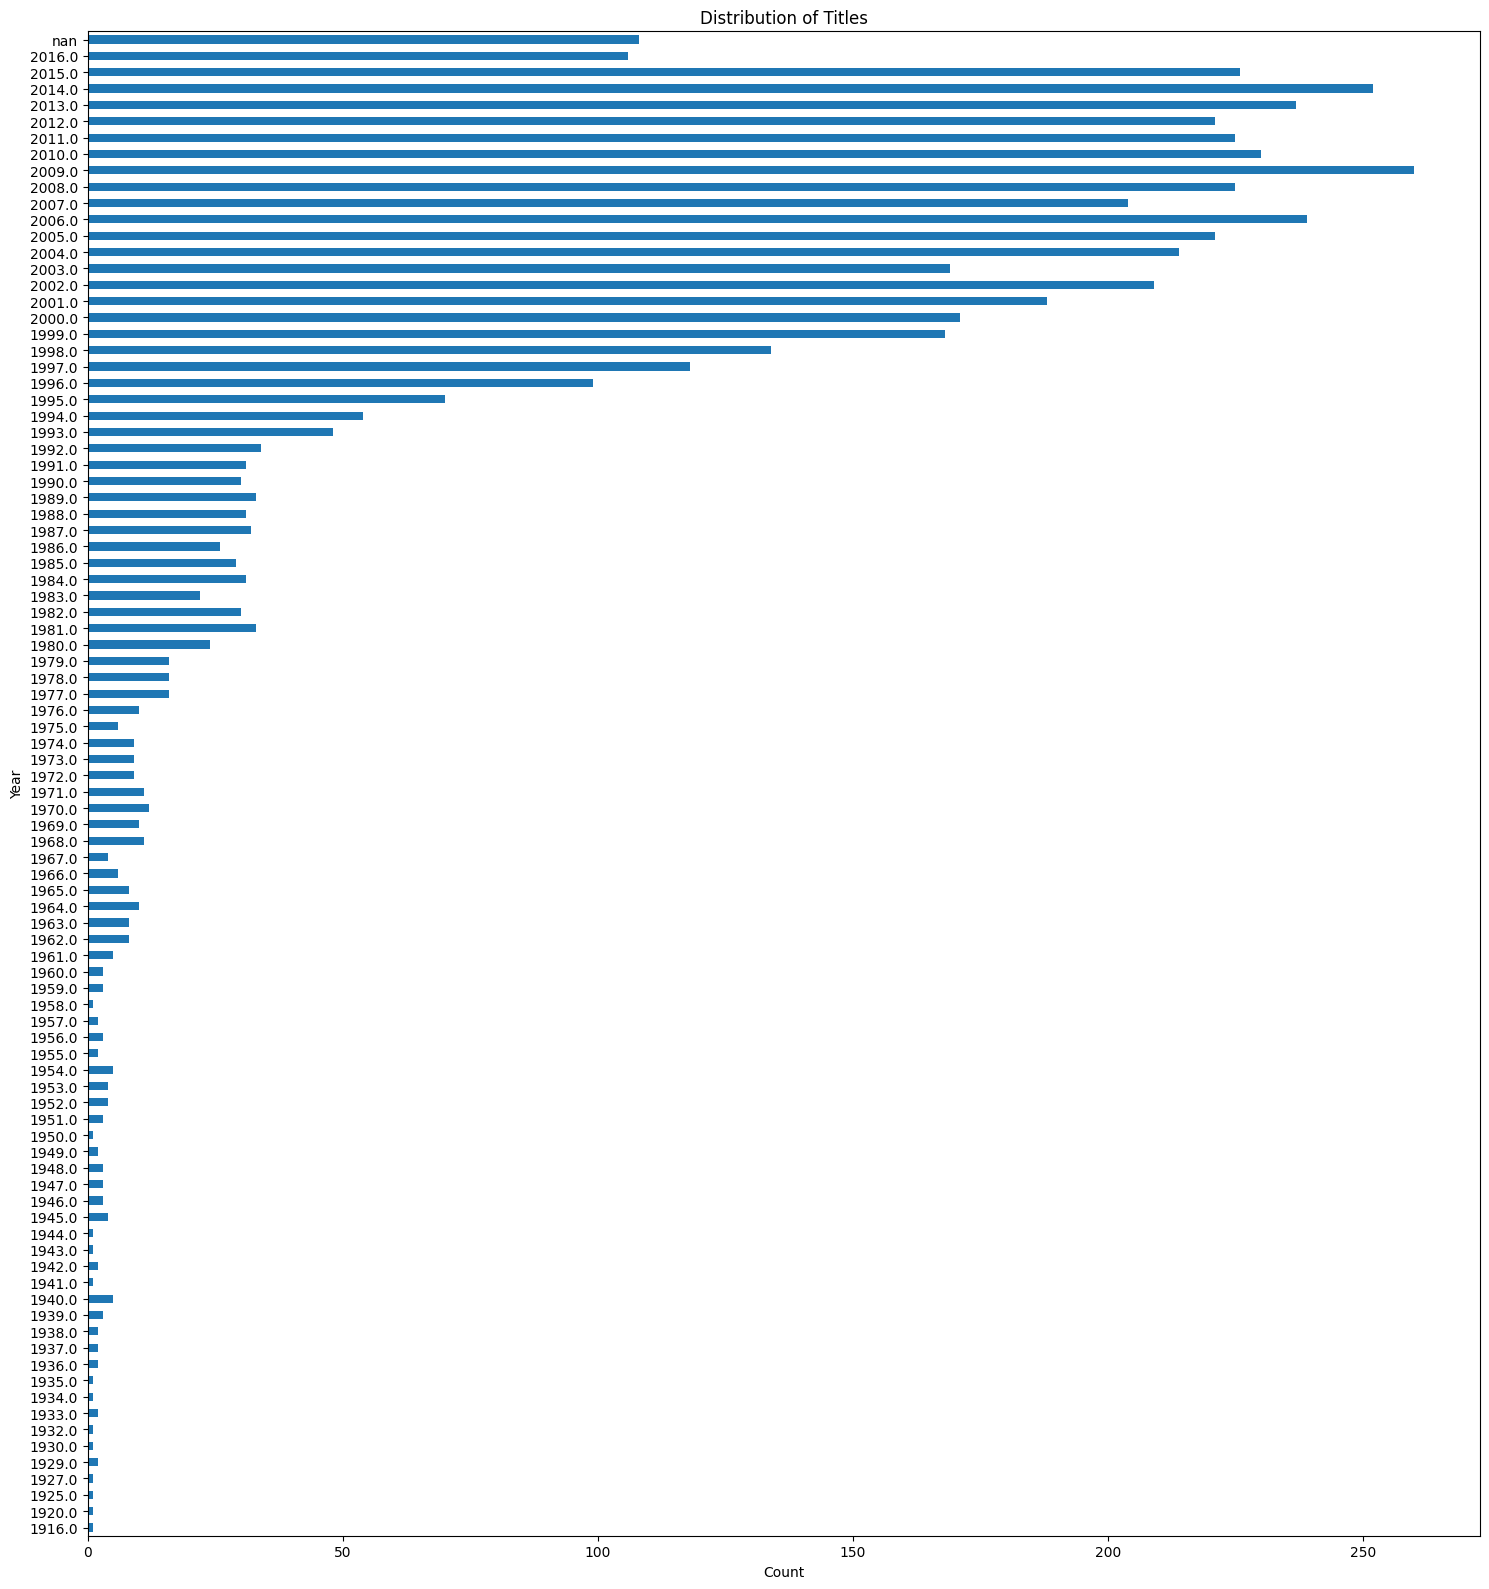

In [14]:
# Count and plot the number of occurrences of each title (including NaNs), sorted by title
title_counts = data['title_year'].value_counts(dropna=False).sort_index()
# Create horizontal bar plot
title_counts.plot.barh(figsize=(15, 16))
plt.xlabel("Count")
plt.ylabel("Year")
plt.title("Distribution of Titles")
plt.tight_layout()
plt.show()

As you can see we have movies from 1916-2016 

#### Data preprocessing 1916-2016 dataset

In [29]:
#Let's select important features that I need because we have a lot of features we can't use all of them
df = df.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action|Adventure|Fantasy|Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action|Adventure|Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action|Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,NaN,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [30]:
#Let's check missing values 
df.isnull().sum()

director_name    104
actor_1_name       7
actor_2_name      13
actor_3_name      23
genres             0
movie_title        0
dtype: int64

In [31]:
#Let's fill nan values with unknown
cols_to_fill = ['actor_1_name','actor_2_name','actor_3_name','director_name']
df[cols_to_fill]=df[cols_to_fill].fillna('unknown')

In [32]:
df.isnull().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [33]:
#Let's get rid of '|' in genres column 
df['genres'] = df['genres'].str.replace('|',' ')

In [34]:
df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,Avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,Pirates of the Caribbean: At World's End
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,Spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,The Dark Knight Rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,Star Wars: Episode VII - The Force Awakens ...


In [35]:
#let's conver movie_title into lowercase 
df['movie_title'] = df['movie_title'].str.lower()

In [36]:
df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens ...


In [44]:
#We have unexpeted character at the end of every row in movie_title column , remove it 
df['movie_title'][0]

'avatar\xa0'

In [45]:
df['movie_title'] = data['movie_title'].str.strip()


In [46]:
df['movie_title'][21]

'the amazing spider-man'

In [47]:
#I save dataset 
df.to_csv('data1.csv',index=False)

#### Importing and preprocessing new dataset for movies in 2017 

In [2]:
credits = pd.read_csv('dataset/credits.csv')
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [3]:
meta = pd.read_csv('dataset/movies_metadata.csv')
meta.head()

C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_26664\1245952178.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv('dataset/movies_metadata.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
#Let's convert release_date column into datetime 
meta['release_date'] = pd.to_datetime(meta['release_date'],errors='coerce')
#Now we will add year column to meta dataframe
meta['year'] = meta['release_date'].dt.year
meta['year'].value_counts().sort_index()

year
1874.0       1
1878.0       1
1883.0       1
1887.0       1
1888.0       2
          ... 
2015.0    1905
2016.0    1604
2017.0     532
2018.0       5
2020.0       1
Name: count, Length: 135, dtype: int64

In [5]:
#We have less informatin for 2018 and 2020 and no data for 2019 so we will only take year 2017 and 4 features only
new_meta = meta.loc[meta.year == 2017,['genres','id','title','year']]

In [6]:
new_meta.head()

,genres,id,title,year
26560,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0
26561,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0
26565,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0
26566,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0
30536,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0


In [7]:
new_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 532 entries, 26560 to 45465
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   genres  532 non-null    object 
 1   id      532 non-null    object 
 2   title   532 non-null    object 
 3   year    532 non-null    float64
dtypes: float64(1), object(3)
memory usage: 20.8+ KB


In [8]:
credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [9]:
#We will convert id column into integer and add id to credits data 
new_meta['id'] = new_meta['id'].astype(int)
data = pd.merge(new_meta,credits,on='id')

In [59]:
data.head()

,genres,id,title,year,cast,crew
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de..."
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de..."
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de..."
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de..."
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de..."


In [10]:
import ast 
#Let's conver genres,cast and crew into list. 
data['genres'] = data['genres'].map(lambda x: ast.literal_eval(x))
data['cast'] = data['cast'].map(lambda x: ast.literal_eval(x))
data['crew'] = data['crew'].map(lambda x: ast.literal_eval(x))

In [16]:
def genre(x):
    gen = []
    st = " "
    for i in x:
        if i.get('name') == 'Science Fiction':
            scifi = 'Sci-Fi' # rename Science Fiction = > Sci-Fi
            gen.append(scifi)
        else:
            gen.append(i.get('name'))
    if gen == []:
        return np.nan
    else:
        return (st.join(gen)) #then we will join them together and return the valuse

In [17]:

data['genres_list'] = data['genres'].map(lambda x: genre(x))
data.head()

,genres,id,title,year,cast,crew,genres_list
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de...",Adventure Action Fantasy Comedy
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de...",Action Adventure Fantasy Sci-Fi
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de...",Action Adventure Fantasy Sci-Fi
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de...",Action Adventure Comedy Sci-Fi
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de...",Fantasy Action Adventure


In [26]:
#let's make cast column like genres_list and get actor 1 
def names(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == []:
        return np.nan
    else:
        return (casts[0])

In [30]:
#we will create new actor_1_name column 
data['actor_1_name'] = data['cast'].map(lambda x: names(x))

In [31]:
data.head()

,genres,id,title,year,cast,crew,genres_list,actor_1_name
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de...",Adventure Action Fantasy Comedy,Johnny Depp
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de...",Action Adventure Fantasy Sci-Fi,Ben Affleck
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de...",Action Adventure Fantasy Sci-Fi,Chris Hemsworth
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de...",Action Adventure Comedy Sci-Fi,Chris Pratt
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de...",Fantasy Action Adventure,Pierce Brosnan


In [35]:
#let's get actor 2 from cast column
def names2(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=1:
        return np.nan
    else:
        return (casts[1])

In [36]:
#we will create actor_2_name column for this 
data['actor_2_name'] = data['cast'].map(lambda x: names2(x))

In [39]:
#let's get actor 2 from cast column
def names3(x):
    casts = []
    for i in x:
        casts.append(i.get('name'))
    if casts == [] or len(casts)<=2:
        return np.nan
    else:
        return (casts[2])

In [40]:
#we will create actor_3_name column for this 
data['actor_3_name'] = data['cast'].map(lambda x: names3(x))

In [41]:
data.head()

,genres,id,title,year,cast,crew,genres_list,actor_1_name,actor_2_name,actor_3_name
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de...",Adventure Action Fantasy Comedy,Johnny Depp,Javier Bardem,Geoffrey Rush
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de...",Action Adventure Fantasy Sci-Fi,Ben Affleck,Henry Cavill,Gal Gadot
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de...",Action Adventure Fantasy Sci-Fi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de...",Action Adventure Comedy Sci-Fi,Chris Pratt,Zoe Saldana,Dave Bautista
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de...",Fantasy Action Adventure,Pierce Brosnan,William Hurt,Benjamin Walker


In [43]:
#Let's take out director names from crew column with the same function above 
def director(x):
    dt = []
    st = " "
    for i in x:
        if i.get('job') == 'Director':
            dt.append(i.get('name'))
    if dt == []:
        return np.nan
    else:
        return (st.join(dt))

In [44]:
data['director_name'] = data['crew'].map(lambda x: director(x))

In [45]:
data.head()

,genres,id,title,year,cast,crew,genres_list,actor_1_name,actor_2_name,actor_3_name,director_name
0,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",166426,Pirates of the Caribbean: Dead Men Tell No Tales,2017.0,"[{'cast_id': 1, 'character': 'Captain Jack Spa...","[{'credit_id': '52fe4c9cc3a36847f8236a65', 'de...",Adventure Action Fantasy Comedy,Johnny Depp,Javier Bardem,Geoffrey Rush,Joachim Rønning Espen Sandberg
1,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",141052,Justice League,2017.0,"[{'cast_id': 2, 'character': 'Bruce Wayne / Ba...","[{'credit_id': '55ef66dbc3a3686f1700a52d', 'de...",Action Adventure Fantasy Sci-Fi,Ben Affleck,Henry Cavill,Gal Gadot,Zack Snyder
2,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",284053,Thor: Ragnarok,2017.0,"[{'cast_id': 0, 'character': 'Thor Odinson', '...","[{'credit_id': '56a93fa4c3a36872db001e7a', 'de...",Action Adventure Fantasy Sci-Fi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Taika Waititi
3,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",283995,Guardians of the Galaxy Vol. 2,2017.0,"[{'cast_id': 3, 'character': 'Peter Quill / St...","[{'credit_id': '59171547925141583c0315a6', 'de...",Action Adventure Comedy Sci-Fi,Chris Pratt,Zoe Saldana,Dave Bautista,James Gunn
4,"[{'id': 14, 'name': 'Fantasy'}, {'id': 28, 'na...",245842,The King's Daughter,2017.0,"[{'cast_id': 0, 'character': 'King Louis XIV',...","[{'credit_id': '5431de49c3a36825d300007e', 'de...",Fantasy Action Adventure,Pierce Brosnan,William Hurt,Benjamin Walker,Sean McNamara


In [46]:
#Let's select only columns that we want to use as we did for our first dataset in the beginning 
movie = data.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres_list','title']]

In [47]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,Pirates of the Caribbean: Dead Men Tell No Tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,Justice League
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,Thor: Ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,Guardians of the Galaxy Vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,The King's Daughter


In [48]:
movie.isna().sum()

director_name     4
actor_1_name     22
actor_2_name     55
actor_3_name     70
genres_list       7
title             0
dtype: int64

In [49]:
movie.shape

(531, 6)

In [50]:
#we don't want missing values let's drop it 
movie = movie.dropna(how='any')

In [51]:
#Let's convert movie title column into lower case 
movie['title']=movie['title'].str.lower()

In [53]:
old = pd.read_csv('data1.csv')
old.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens


In [54]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres_list,title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter


In [55]:
#As you can see above we have some mismatch on two column names genres and moive_title let's rename it 
movie = movie.rename(columns={'genres_list':'genres'})
movie = movie.rename(columns={'title':'movie_title'})

In [56]:
movie.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter


In [62]:
#Let's add actors , directors names and genres together for TfidfVectorizer for later 
old['comb'] = old['actor_1_name'] + ' ' + old['actor_2_name'] + ' '+ old['actor_3_name'] + ' '+ old['director_name'] +' ' + old['genres']
old

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5038,Scott Smith,Eric Mabius,Daphne Zuniga,Crystal Lowe,Comedy Drama,signed sealed delivered,Eric Mabius Daphne Zuniga Crystal Lowe Scott S...
5039,unknown,Natalie Zea,Valorie Curry,Sam Underwood,Crime Drama Mystery Thriller,the following,Natalie Zea Valorie Curry Sam Underwood unknow...
5040,Benjamin Roberds,Eva Boehnke,Maxwell Moody,David Chandler,Drama Horror Thriller,a plague so pleasant,Eva Boehnke Maxwell Moody David Chandler Benja...
5041,Daniel Hsia,Alan Ruck,Daniel Henney,Eliza Coupe,Comedy Drama Romance,shanghai calling,Alan Ruck Daniel Henney Eliza Coupe Daniel Hsi...


In [61]:
#let's create a combination column for our movie dataframe 
movie['comb'] = movie['actor_1_name'] + ' ' + movie['actor_2_name'] + ' '+ movie['actor_3_name'] + ' '+ movie['director_name'] +' ' + movie['genres']
movie

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Joachim Rønning Espen Sandberg,Johnny Depp,Javier Bardem,Geoffrey Rush,Adventure Action Fantasy Comedy,pirates of the caribbean: dead men tell no tales,Johnny Depp Javier Bardem Geoffrey Rush Joachi...
1,Zack Snyder,Ben Affleck,Henry Cavill,Gal Gadot,Action Adventure Fantasy Sci-Fi,justice league,Ben Affleck Henry Cavill Gal Gadot Zack Snyder...
2,Taika Waititi,Chris Hemsworth,Tom Hiddleston,Cate Blanchett,Action Adventure Fantasy Sci-Fi,thor: ragnarok,Chris Hemsworth Tom Hiddleston Cate Blanchett ...
3,James Gunn,Chris Pratt,Zoe Saldana,Dave Bautista,Action Adventure Comedy Sci-Fi,guardians of the galaxy vol. 2,Chris Pratt Zoe Saldana Dave Bautista James Gu...
4,Sean McNamara,Pierce Brosnan,William Hurt,Benjamin Walker,Fantasy Action Adventure,the king's daughter,Pierce Brosnan William Hurt Benjamin Walker Se...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [65]:
together = pd.concat([old, movie])
together

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [67]:
#we are dropping the duplicated valuse and keeping only the last one, so that there will be only one type of a particular movie and not duplicates of same movie
together.drop_duplicates(subset ="movie_title", keep = 'last', inplace = True)
together

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
524,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
525,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
526,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
527,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [68]:
#Let's save it to new_data csv 
together.to_csv('new_data.csv',index=False)

#### Data preprocessing for 2018-2019 movies dataset

In [72]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2018"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [74]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2]
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); La...,[3]
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[4]
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Chris...",[5]
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzan...,[6]


As it is observed in the above table, we do not have the genre column so we will get the genre data from IMDb. You will need to create an API key in order to access the API key.

In [75]:
!pip install tmdbv3api

In [76]:
#Let's get api key from https://www.themoviedb.org
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '69003a43f7f5d31c0dc865df3366ba70' 

In [78]:
from tmdbv3api import Movie
tmdb_movie = Movie()
def get_genre(x): #pass in the title of the movies
    genres = []
    result = tmdb_movie.search(x) #the title will be searched in the tmdb_movie
    movie_id = result[0].id #we will match the "id" with the "title"
    response = requests.get('https://api.themoviedb.org/3/movie/{}?api_key={}'.format(movie_id,tmdb.api_key)) #we will get the result from the IMDb data
    data_json = response.json() #we will then convert it to a json file
    if data_json['genres']: #in the json file we will only need to extract the "genre"
        genre_str = " " 
        for i in range(0,len(data_json['genres'])):
            genres.append(data_json['genres'][i]['name']) #we will then add the "genre" to the empty genre list we created above
        return genre_str.join(genres)
    else:
        np.nan # we will return the results but if we don't find anything we will consider it as a missing value

In [79]:
#let's create genres column for our dataset df 
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))
df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,J A N U A R Y,5,Insidious: The Last Key,Universal Pictures / Blumhouse Productions / S...,Adam Robitel (director); Leigh Whannell (scree...,[2],Horror Thriller
1,J A N U A R Y,5,The Strange Ones,Vertical Entertainment,Christopher Radcliff (director/screenplay); La...,[3],Thriller Drama
2,J A N U A R Y,12,The Commuter,Lionsgate / StudioCanal / The Picture Company,Jaume Collet-Serra (director); Byron Willinger...,[4],Action Thriller Mystery
3,J A N U A R Y,12,Proud Mary,Screen Gems,"Babak Najafi (director); John S. Newman, Chris...",[5],Thriller Action Crime
4,J A N U A R Y,12,Acts of Violence,Lionsgate Premiere,Brett Donowho (director); Nicolas Aaron Mezzan...,[6],Action Drama Crime Thriller


In [80]:
#Let's select important columns 
df_2018 = df[['Title','Cast and crew','genres']]
df_2018.head()

,Title,Cast and crew,genres
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Thriller
1,The Strange Ones,Christopher Radcliff (director/screenplay); La...,Thriller Drama
2,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery
3,Proud Mary,"Babak Najafi (director); John S. Newman, Chris...",Thriller Action Crime
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzan...,Action Drama Crime Thriller


In [92]:
import warnings
warnings.simplefilter(action='ignore', category=pd.errors.SettingWithCopyWarning)

def get_director(x):
    if " (director/screenplay)" in x:
        return x.split(" (director/screenplay)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    elif " (director)" in x:
        return x.split(" (director)")[0]
    else:
        return x.split(";")[0].strip()  # fallback: take first name before semicolon


In [93]:
#let's apply the above function on the "Cast and crew" column
df_2018['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))
df_2018.head()

,Title,Cast and crew,genres,director_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Thriller,Adam Robitel
1,The Strange Ones,Christopher Radcliff (director/screenplay); La...,Thriller Drama,Christopher Radcliff
2,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,Jaume Collet-Serra
3,Proud Mary,"Babak Najafi (director); John S. Newman, Chris...",Thriller Action Crime,Babak Najafi
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzan...,Action Drama Crime Thriller,Brett Donowho


In [94]:
df_2018['director_name']

0              Adam Robitel
1      Christopher Radcliff
2        Jaume Collet-Serra
3              Babak Najafi
4             Brett Donowho
               ...         
245             Peter Segal
246              Etan Cohen
247              Adam McKay
248              Mimi Leder
249            Karyn Kusama
Name: director_name, Length: 250, dtype: object

In [98]:
#let's start making our actor names like actor_1_name 
def get_actor1(x):
    parts = x.split(";")
    if len(parts) > 1:
        actor_block = parts[-1].strip()  # actor section
        return actor_block.split(", ")[0]
    else:
        return None
df_2018.loc[:, 'actor_1_name'] = df_2018['Cast and crew'].map(get_actor1)

In [99]:
df_2018.head()

,Title,Cast and crew,genres,director_name,actor_1_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Thriller,Adam Robitel,Lin Shaye
1,The Strange Ones,Christopher Radcliff (director/screenplay); La...,Thriller Drama,Christopher Radcliff,Alex Pettyfer
2,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson
3,Proud Mary,"Babak Najafi (director); John S. Newman, Chris...",Thriller Action Crime,Babak Najafi,Taraji P. Henson
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzan...,Action Drama Crime Thriller,Brett Donowho,Bruce Willis


In [102]:
#Let's get actor_2_name 
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])
df_2018['actor_2_name'] = df_2018['Cast and crew'].map(lambda x: get_actor2(x))

In [103]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Thriller,Adam Robitel,Lin Shaye,Angus Sampson
1,The Strange Ones,Christopher Radcliff (director/screenplay); La...,Thriller Drama,Christopher Radcliff,Alex Pettyfer,James Freedson-Jackson
2,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga
3,Proud Mary,"Babak Najafi (director); John S. Newman, Chris...",Thriller Action Crime,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzan...,Action Drama Crime Thriller,Brett Donowho,Bruce Willis,Cole Hauser
...,...,...,...,...,...,...
245,Second Act,"Peter Segal (director); Justin Zackham, Elaine...",Romance Comedy,Peter Segal,Jennifer Lopez,Leah Remini
246,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Drama Mystery Thriller Crime,Etan Cohen,Will Ferrell,John C. Reilly
247,Vice,Adam McKay (director/screenplay); Christian Ba...,Thriller Science Fiction Action Adventure,Adam McKay,Christian Bale,Amy Adams
248,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder,Felicity Jones,Armie Hammer


In [105]:
#Let's get actor 3
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])
df_2018['actor_3_name'] = df_2018['Cast and crew'].map(lambda x: get_actor3(x))

In [106]:
df_2018

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Insidious: The Last Key,Adam Robitel (director); Leigh Whannell (scree...,Horror Thriller,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell
1,The Strange Ones,Christopher Radcliff (director/screenplay); La...,Thriller Drama,Christopher Radcliff,Alex Pettyfer,James Freedson-Jackson,Emily Althaus
2,The Commuter,Jaume Collet-Serra (director); Byron Willinger...,Action Thriller Mystery,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson
3,Proud Mary,"Babak Najafi (director); John S. Newman, Chris...",Thriller Action Crime,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown
4,Acts of Violence,Brett Donowho (director); Nicolas Aaron Mezzan...,Action Drama Crime Thriller,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore
...,...,...,...,...,...,...,...
245,Second Act,"Peter Segal (director); Justin Zackham, Elaine...",Romance Comedy,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens
246,Holmes & Watson,Etan Cohen (director/screenplay); Will Ferrell...,Drama Mystery Thriller Crime,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall
247,Vice,Adam McKay (director/screenplay); Christian Ba...,Thriller Science Fiction Action Adventure,Adam McKay,Christian Bale,Amy Adams,Steve Carell
248,On the Basis of Sex,Mimi Leder (director); Daniel Stiepleman (scre...,Drama History,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux


In [107]:
#Let's reanme Title => movie_title as my preivous dataset column names 
df_2018 = df_2018.rename(columns={'Title':'movie_title'})
#Then select necessary columns 
new_df18 = df_2018.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]
new_df18.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Thriller,Insidious: The Last Key
1,Christopher Radcliff,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,The Strange Ones
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,The Commuter
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,Proud Mary
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Drama Crime Thriller,Acts of Violence


In [108]:
#Let's check for nan values 
new_df18.isna().sum()

director_name     0
actor_1_name      3
actor_2_name      5
actor_3_name     16
genres            1
movie_title       0
dtype: int64

In [111]:
#Let's replace it with unkown
new_df18['actor_1_name']=new_df18['actor_1_name'].replace(np.nan,'uknown')
new_df18['actor_2_name']=new_df18['actor_2_name'].replace(np.nan,'uknown')
new_df18['actor_3_name']=new_df18['actor_3_name'].replace(np.nan,'uknown')
new_df18['genres']=new_df18['genres'].replace(np.nan,'uknown')
#now we will lowercase moive title 
new_df18['movie_title'] = new_df18['movie_title'].str.lower()
new_df18.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Thriller,insidious: the last key
1,Christopher Radcliff,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,proud mary
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Drama Crime Thriller,acts of violence


In [112]:
new_df18.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [113]:
#Let's create comb column for this dataframe also 
new_df18['comb'] = new_df18['actor_1_name'] + ' ' + new_df18['actor_2_name'] + ' '+ new_df18['actor_3_name'] + ' '+ new_df18['director_name'] +' ' + new_df18['genres']
new_df18

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Ro...
1,Christopher Radcliff,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Alt...
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume ...
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,proud mary,Taraji P. Henson Jahi Di'Allo Winston Billy Br...
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Drama Crime Thriller,acts of violence,Bruce Willis Cole Hauser Shawn Ashmore Brett D...
...,...,...,...,...,...,...,...
245,Peter Segal,Jennifer Lopez,Leah Remini,Vanessa Hudgens,Romance Comedy,second act,Jennifer Lopez Leah Remini Vanessa Hudgens Pet...
246,Etan Cohen,Will Ferrell,John C. Reilly,Rebecca Hall,Drama Mystery Thriller Crime,holmes & watson,Will Ferrell John C. Reilly Rebecca Hall Etan ...
247,Adam McKay,Christian Bale,Amy Adams,Steve Carell,Thriller Science Fiction Action Adventure,vice,Christian Bale Amy Adams Steve Carell Adam McK...
248,Mimi Leder,Felicity Jones,Armie Hammer,Justin Theroux,Drama History,on the basis of sex,Felicity Jones Armie Hammer Justin Theroux Mim...


#### Data preprocessing for 2019 movies 

In [115]:
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2019"
df1 = pd.read_html(link, header=0)[2]
df2 = pd.read_html(link, header=0)[3]
df3 = pd.read_html(link, header=0)[4]
df4 = pd.read_html(link, header=0)[5]

In [116]:
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria...",[2]
1,J A N U A R Y,4,Rust Creek,IFC Films / Lunacy Productions,Jen McGowan (director); Julie Lipson (screenpl...,[3]
2,J A N U A R Y,4,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4]
3,J A N U A R Y,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5]
4,J A N U A R Y,11,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6]


In [117]:
#we will create genres column by using function that we have creted for 2018 dataset
df['genres'] = df['Title'].map(lambda x: get_genre(str(x)))

In [118]:
df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.,genres
0,J A N U A R Y,4,Escape Room,Columbia Pictures / Original Film,"Adam Robitel (director); Bragi F. Schut, Maria...",[2],Horror Thriller Fantasy
1,J A N U A R Y,4,Rust Creek,IFC Films / Lunacy Productions,Jen McGowan (director); Julie Lipson (screenpl...,[3],Thriller Drama Action Crime
2,J A N U A R Y,4,American Hangman,Hangman Justice Productions,Wilson Coneybeare (director/screenplay); Donal...,[4],Thriller
3,J A N U A R Y,11,A Dog's Way Home,Columbia Pictures,Charles Martin Smith (director); W. Bruce Came...,[5],Drama Adventure Family
4,J A N U A R Y,11,The Upside,STX Entertainment,Neil Burger (director); Jon Hartmere (screenpl...,[6],Comedy Drama


In [119]:
df_2019 = df[['Title','Cast and crew','genres']]
df_2019.head()

,Title,Cast and crew,genres
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria...",Horror Thriller Fantasy
1,Rust Creek,Jen McGowan (director); Julie Lipson (screenpl...,Thriller Drama Action Crime
2,American Hangman,Wilson Coneybeare (director/screenplay); Donal...,Thriller
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Came...,Drama Adventure Family
4,The Upside,Neil Burger (director); Jon Hartmere (screenpl...,Comedy Drama


In [125]:
#Let's get director name 
def get_director(x):
    if " (director/screenplay)" in x:
        return x.split(" (director/screenplay)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    elif " (director)" in x:
        return x.split(" (director)")[0]
    else:
        return x.split(";")[0].strip()  # fallback: take first name before semicolon
df_2019['director_name'] = df_2018['Cast and crew'].map(lambda x: get_director(x))
df_2019.head()

,Title,Cast and crew,genres,director_name
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria...",Horror Thriller Fantasy,Adam Robitel
1,Rust Creek,Jen McGowan (director); Julie Lipson (screenpl...,Thriller Drama Action Crime,Christopher Radcliff
2,American Hangman,Wilson Coneybeare (director/screenplay); Donal...,Thriller,Jaume Collet-Serra
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Came...,Drama Adventure Family,Babak Najafi
4,The Upside,Neil Burger (director); Jon Hartmere (screenpl...,Comedy Drama,Brett Donowho


In [126]:
#Let's get actor_1_name 
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])
df_2019['actor_1_name'] = df_2019['Cast and crew'].map(lambda x: get_actor1(x))

In [128]:
#Let'sget actor_2_name
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])
df_2019['actor_2_name'] = df_2019['Cast and crew'].map(lambda x: get_actor2(x))

In [130]:
#Let's get actor_3_name
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])
df_2019['actor_3_name'] = df_2019['Cast and crew'].map(lambda x: get_actor3(x))

In [131]:
df_2019.head()

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,Escape Room,"Adam Robitel (director); Bragi F. Schut, Maria...",Horror Thriller Fantasy,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll
1,Rust Creek,Jen McGowan (director); Julie Lipson (screenpl...,Thriller Drama Action Crime,Christopher Radcliff,Hermione Corfield,Jay Paulson,Sean O'Bryan
2,American Hangman,Wilson Coneybeare (director/screenplay); Donal...,Thriller,Jaume Collet-Serra,Donald Sutherland,Vincent Kartheiser,Oliver Dennis
3,A Dog's Way Home,Charles Martin Smith (director); W. Bruce Came...,Drama Adventure Family,Babak Najafi,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp
4,The Upside,Neil Burger (director); Jon Hartmere (screenpl...,Comedy Drama,Brett Donowho,Bryan Cranston,Kevin Hart,Nicole Kidman


In [132]:
#Let's rename Title column to => movie_title
df_2019 = df_2019.rename(columns={'Title':'movie_title'})
#now we will only take importrant columns 
new_df19 = df_2019.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [133]:
new_df19.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Fantasy,Escape Room
1,Christopher Radcliff,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama Action Crime,Rust Creek
2,Jaume Collet-Serra,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,American Hangman
3,Babak Najafi,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,A Dog's Way Home
4,Brett Donowho,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,The Upside


In [134]:
#Let's check for missing values 
new_df19.isna().sum()

director_name     0
actor_1_name      0
actor_2_name      1
actor_3_name     17
genres            0
movie_title       0
dtype: int64

In [136]:
#Let's replce missing values with 'unkown'
new_df19['actor_2_name'] = new_df19['actor_2_name'].replace(np.nan, 'unknown')
new_df19['actor_3_name'] = new_df19['actor_3_name'].replace(np.nan, 'unknown')
#now we will lowercase movie_title coumn 
new_df19['movie_title'] = new_df19['movie_title'].str.lower()

In [137]:
new_df19.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Fantasy,escape room
1,Christopher Radcliff,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama Action Crime,rust creek
2,Jaume Collet-Serra,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman
3,Babak Najafi,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home
4,Brett Donowho,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside


In [138]:
new_df19.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
dtype: int64

In [139]:
#Let's make comb column for later 
new_df19['comb'] = new_df19['actor_1_name'] + ' ' + new_df19['actor_2_name'] + ' '+ new_df19['actor_3_name'] + ' '+ new_df19['director_name'] +' ' + new_df19['genres']
new_df19

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Taylor Russell,Logan Miller,Deborah Ann Woll,Horror Thriller Fantasy,escape room,Taylor Russell Logan Miller Deborah Ann Woll A...
1,Christopher Radcliff,Hermione Corfield,Jay Paulson,Sean O'Bryan,Thriller Drama Action Crime,rust creek,Hermione Corfield Jay Paulson Sean O'Bryan Chr...
2,Jaume Collet-Serra,Donald Sutherland,Vincent Kartheiser,Oliver Dennis,Thriller,american hangman,Donald Sutherland Vincent Kartheiser Oliver De...
3,Babak Najafi,Bryce Dallas Howard,Edward James Olmos,Alexandra Shipp,Drama Adventure Family,a dog's way home,Bryce Dallas Howard Edward James Olmos Alexand...
4,Brett Donowho,Bryan Cranston,Kevin Hart,Nicole Kidman,Comedy Drama,the upside,Bryan Cranston Kevin Hart Nicole Kidman Brett ...
...,...,...,...,...,...,...,...
245,Peter Segal,Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,Will Smith Tom Holland Rashida Jones Peter Seg...
246,Etan Cohen,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Etan C...
247,Adam McKay,George MacKay,Dean-Charles Chapman,Mark Strong,War History Thriller Drama,1917,George MacKay Dean-Charles Chapman Mark Strong...
248,Mimi Leder,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Mimi ...


In [141]:
#Let's add them to each other 
my_df = pd.concat([new_df18, new_df19], ignore_index=True)
my_df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Adam Robitel,Lin Shaye,Angus Sampson,Leigh Whannell,Horror Thriller,insidious: the last key,Lin Shaye Angus Sampson Leigh Whannell Adam Ro...
1,Christopher Radcliff,Alex Pettyfer,James Freedson-Jackson,Emily Althaus,Thriller Drama,the strange ones,Alex Pettyfer James Freedson-Jackson Emily Alt...
2,Jaume Collet-Serra,Liam Neeson,Vera Farmiga,Patrick Wilson,Action Thriller Mystery,the commuter,Liam Neeson Vera Farmiga Patrick Wilson Jaume ...
3,Babak Najafi,Taraji P. Henson,Jahi Di'Allo Winston,Billy Brown,Thriller Action Crime,proud mary,Taraji P. Henson Jahi Di'Allo Winston Billy Br...
4,Brett Donowho,Bruce Willis,Cole Hauser,Shawn Ashmore,Action Drama Crime Thriller,acts of violence,Bruce Willis Cole Hauser Shawn Ashmore Brett D...


In [144]:
#Let's load our dataset until 2017 
old_df = pd.read_csv('new_data.csv')
old_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5356,Jim Strouse,Jessica Williams,Chris O'Dowd,Keith Stanfield,Romance Comedy,the incredible jessica james,Jessica Williams Chris O'Dowd Keith Stanfield ...
5357,Farhad Mann,Adelaide Kane,Benjamin Hollingsworth,Jean Louisa Kelly,Romance,can't buy my love,Adelaide Kane Benjamin Hollingsworth Jean Loui...
5358,Hannaleena Hauru,Inka Haapamäki,Rosa Honkonen,Tiitus Rantala,Romance Comedy,thick lashes of lauri mäntyvaara,Inka Haapamäki Rosa Honkonen Tiitus Rantala Ha...
5359,Jonathan A. Rosenbaum,Lou Diamond Phillips,Wallace Shawn,Gina Holden,Crime Comedy Action Family,cop and a half: new recruit,Lou Diamond Phillips Wallace Shawn Gina Holden...


In [146]:
#Let's add dataset until 2017 + 2018 + 2019 
final_df = pd.concat([old_df,my_df],ignore_index=True)
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
5856,Peter Segal,Will Smith,Tom Holland,Rashida Jones,Animation Action Adventure Comedy Family,spies in disguise,Will Smith Tom Holland Rashida Jones Peter Seg...
5857,Etan Cohen,Saoirse Ronan,Emma Watson,Florence Pugh,Drama Romance History,little women,Saoirse Ronan Emma Watson Florence Pugh Etan C...
5858,Adam McKay,George MacKay,Dean-Charles Chapman,Mark Strong,War History Thriller Drama,1917,George MacKay Dean-Charles Chapman Mark Strong...
5859,Mimi Leder,Michael B. Jordan,Jamie Foxx,Brie Larson,Drama Crime History,just mercy,Michael B. Jordan Jamie Foxx Brie Larson Mimi ...


In [147]:
#let's drop missing values and save it to new file 
final_df = final_df.dropna(how='any')
final_df.to_csv('final_data.csv',index=False)

#### Data preprocessingfor 2020 dataset WK

In [148]:
import requests
import bs4 as bs
import urllib.request

In [150]:
#Let's load dataset from wiki
link = "https://en.wikipedia.org/wiki/List_of_American_films_of_2020"

source = urllib.request.urlopen(link).read()
soup = bs.BeautifulSoup(source,'lxml')

In [151]:
#let's make tabels
tables = soup.find_all('table',class_='wikitable sortable')

In [153]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
df1 = pd.read_html(str(tables[0]))[0]
df2 = pd.read_html(str(tables[1]))[0]
df3 = pd.read_html(str(tables[2]))[0]
df4 = pd.read_html(str(tables[3]).replace("'1\"\'",'"1"'))[0] # avoided "ValueError: invalid literal for int() with base 10: '1"'

In [154]:
#Let's add them
df = pd.concat([df1, df2, df3, df4], ignore_index=True)
df.head()

,Opening,Opening.1,Title,Production company,Cast and crew,Ref.
0,J A N U A R Y,3,The Grudge,Screen Gems / Stage 6 Films / Ghost House Pict...,Nicolas Pesce (director/screenplay); Andrea Ri...,[2]
1,J A N U A R Y,10,Underwater,20th Century Fox / TSG Entertainment / Chernin...,"William Eubank (director); Brian Duffield, Ada...",[3]
2,J A N U A R Y,10,Like a Boss,Paramount Pictures / Artists First,"Miguel Arteta (director); Sam Pitman, Adam Col...",[4]
3,J A N U A R Y,10,Three Christs,IFC Films,Jon Avnet (director/screenplay); Eric Nazarian...,NaN
4,J A N U A R Y,10,Inherit the Viper,Lionsgate / Barry Films / Tycor International ...,Anthony Jerjen (director); Andrew Crabtree (sc...,[5]


In [168]:
#let's select Title and Cast and crew column 
df_2020 = df[['Title','Cast and crew']]
df_2020

,Title,Cast and crew
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...
1,Underwater,"William Eubank (director); Brian Duffield, Ada..."
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col..."
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...
...,...,...
273,We Can Be Heroes,Robert Rodriguez (director/screenplay); Priyan...
274,News of the World,Paul Greengrass (director/screenplay); Luke Da...
275,One Night in Miami...,Regina King (director); Kemp Powers (screenpla...
276,Promising Young Woman,Emerald Fennell (director/screenplay); Carey M...


As you can see above we don't have generes we have to get it thorug api 

In [169]:
#Let's get api key from https://www.themoviedb.org
from tmdbv3api import TMDb
import json
import requests
tmdb = TMDb()
tmdb.api_key = '69003a43f7f5d31c0dc865df3366ba70' 

In [176]:
import numpy as np
import time

def get_genre(x):
    try:
        genres = []
        result = tmdb_movie.search(x)
        result_list = list(result)

        if not result_list or not hasattr(result_list[0], 'id'):
            return np.nan

        movie_id = result_list[0].id

        # Be nice to the API (optional but helpful)
        time.sleep(0.2)

        response = requests.get(
            f'https://api.themoviedb.org/3/movie/{movie_id}?api_key={tmdb.api_key}'
        )
        data_json = response.json()

        if 'genres' in data_json and data_json['genres']:
            return ' '.join([genre['name'] for genre in data_json['genres']])
        else:
            return np.nan
    except Exception as e:
        print(f"Error for '{x}': {e}")
        return np.nan



In [177]:
#Let's create genres column 
df_2020['genres'] = df_2020['Title'].map(lambda x: get_genre(str(x)))

In [178]:
df_2020.head() 

,Title,Cast and crew,genres
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,Horror Mystery Thriller
1,Underwater,"William Eubank (director); Brian Duffield, Ada...",Horror Science Fiction Action Adventure
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...,Drama
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...,Crime Thriller Drama


In [179]:
#Let's get director name 
def get_director(x):
    if " (director)" in x:
        return x.split(" (director)")[0]
    elif " (directors)" in x:
        return x.split(" (directors)")[0]
    else:
        return x.split(" (director/screenplay)")[0]

In [182]:
df_2020['director_name'] = df_2020['Cast and crew'].map(lambda x: get_director(str(x)))
df_2020

,Title,Cast and crew,genres,director_name
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,Horror Mystery Thriller,Nicolas Pesce
1,Underwater,"William Eubank (director); Brian Duffield, Ada...",Horror Science Fiction Action Adventure,William Eubank
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy,Miguel Arteta
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...,Drama,Jon Avnet
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...,Crime Thriller Drama,Anthony Jerjen
...,...,...,...,...
273,We Can Be Heroes,Robert Rodriguez (director/screenplay); Priyan...,Family Action Fantasy Comedy,Robert Rodriguez
274,News of the World,Paul Greengrass (director/screenplay); Luke Da...,Drama Western Adventure,Paul Greengrass
275,One Night in Miami...,Regina King (director); Kemp Powers (screenpla...,Drama,Regina King
276,Promising Young Woman,Emerald Fennell (director/screenplay); Carey M...,Thriller Crime Drama,Emerald Fennell


In [183]:
#Let's get actor 1 
def get_actor1(x):
    return ((x.split("screenplay); ")[-1]).split(", ")[0])
df_2020['actor_1_name'] = df_2020['Cast and crew'].map(lambda x: get_actor1(str(x)))

In [185]:
#Let's get actor 2 
def get_actor2(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 2:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[1])
df_2020['actor_2_name'] = df_2020['Cast and crew'].map(lambda x: get_actor2(str(x)))

In [187]:
#Let's get actor 3 
def get_actor3(x):
    if len((x.split("screenplay); ")[-1]).split(", ")) < 3:
        return np.nan
    else:
        return ((x.split("screenplay); ")[-1]).split(", ")[2])
df_2020['actor_3_name'] = df_2020['Cast and crew'].map(lambda x: get_actor3(str(x)))

In [188]:
df_2020.head()

,Title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,The Grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,Horror Mystery Thriller,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,Underwater,"William Eubank (director); Brian Duffield, Ada...",Horror Science Fiction Action Adventure,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,Like a Boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,Three Christs,Jon Avnet (director/screenplay); Eric Nazarian...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,Inherit the Viper,Anthony Jerjen (director); Andrew Crabtree (sc...,Crime Thriller Drama,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs


In [189]:
#let's rename Title = > movie_title 
df_2020 = df_2020.rename(columns={'Title':'movie_title'})
#Let's lowercase movie_title 
df_2020['movie_title'] = df_2020['movie_title'].str.lower()
df_2020.head()

,movie_title,Cast and crew,genres,director_name,actor_1_name,actor_2_name,actor_3_name
0,the grudge,Nicolas Pesce (director/screenplay); Andrea Ri...,Horror Mystery Thriller,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho
1,underwater,"William Eubank (director); Brian Duffield, Ada...",Horror Science Fiction Action Adventure,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick
2,like a boss,"Miguel Arteta (director); Sam Pitman, Adam Col...",Comedy,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek
3,three christs,Jon Avnet (director/screenplay); Eric Nazarian...,Drama,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins
4,inherit the viper,Anthony Jerjen (director); Andrew Crabtree (sc...,Crime Thriller Drama,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs


In [190]:
# we will select important features now 
new_df20 = df_2020.loc[:,['director_name','actor_1_name','actor_2_name','actor_3_name','genres','movie_title']]

In [191]:
new_df20.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,the grudge
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Horror Science Fiction Action Adventure,underwater
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,inherit the viper


In [192]:
# Let's make combination column 
new_df20['comb'] = new_df20['actor_1_name'] + ' ' + new_df20['actor_2_name'] + ' '+ new_df20['actor_3_name'] + ' '+ new_df20['director_name'] +' ' + new_df20['genres']
new_df20.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,Nicolas Pesce,Andrea Riseborough,Demián Bichir,John Cho,Horror Mystery Thriller,the grudge,Andrea Riseborough Demián Bichir John Cho Nico...
1,William Eubank,Kristen Stewart,Vincent Cassel,Jessica Henwick,Horror Science Fiction Action Adventure,underwater,Kristen Stewart Vincent Cassel Jessica Henwick...
2,Miguel Arteta,Tiffany Haddish,Rose Byrne,Salma Hayek,Comedy,like a boss,Tiffany Haddish Rose Byrne Salma Hayek Miguel ...
3,Jon Avnet,Richard Gere,Peter Dinklage,Walton Goggins,Drama,three christs,Richard Gere Peter Dinklage Walton Goggins Jon...
4,Anthony Jerjen,Josh Hartnett,Margarita Levieva,Chandler Riggs,Crime Thriller Drama,inherit the viper,Josh Hartnett Margarita Levieva Chandler Riggs...


In [194]:
#let's drop missing values 
new_df20 = new_df20.dropna(how='any')
new_df20.isna().sum()

director_name    0
actor_1_name     0
actor_2_name     0
actor_3_name     0
genres           0
movie_title      0
comb             0
dtype: int64

In [195]:
#Let's load our datastet until 2019 
old_df = pd.read_csv('final_data.csv')
old_df.head()

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Doc...


In [197]:
#Let's add dataset until 2019 with 2020
final_df = pd.concat([old_df,new_df20],ignore_index=True)
final_df

,director_name,actor_1_name,actor_2_name,actor_3_name,genres,movie_title,comb
0,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,Action Adventure Fantasy Sci-Fi,avatar,CCH Pounder Joel David Moore Wes Studi James C...
1,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,Action Adventure Fantasy,pirates of the caribbean: at world's end,Johnny Depp Orlando Bloom Jack Davenport Gore ...
2,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,Action Adventure Thriller,spectre,Christoph Waltz Rory Kinnear Stephanie Sigman ...
3,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,Action Thriller,the dark knight rises,Tom Hardy Christian Bale Joseph Gordon-Levitt ...
4,Doug Walker,Doug Walker,Rob Walker,unknown,Documentary,star wars: episode vii - the force awakens,Doug Walker Rob Walker unknown Doug Walker Doc...
...,...,...,...,...,...,...,...
6105,Pete Docter,Jamie Foxx,Tina Fey,Graham Norton,Animation Family Comedy Fantasy,soul,Jamie Foxx Tina Fey Graham Norton Pete Docter ...
6106,Robert Rodriguez,Priyanka Chopra Jonas,Pedro Pascal,YaYa Gosselin,Family Action Fantasy Comedy,we can be heroes,Priyanka Chopra Jonas Pedro Pascal YaYa Gossel...
6107,Regina King,Kingsley Ben-Adir,Eli Goree,Aldis Hodge,Drama,one night in miami...,Kingsley Ben-Adir Eli Goree Aldis Hodge Regina...
6108,Emerald Fennell,Carey Mulligan,Bo Burnham,Alison Brie,Thriller Crime Drama,promising young woman,Carey Mulligan Bo Burnham Alison Brie Emerald ...


In [199]:
#let's save the dataset
final_df.to_csv('main_data.csv',index=False)

#### Building NLP model for reviews 

In [204]:
import nltk 
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn import naive_bayes 
from sklearn.metrics import roc_auc_score,accuracy_score
import pickle

In [205]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to C:\Users\Asus
[nltk_data]     TUF\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [207]:
dataset = pd.read_csv('reviews.txt', sep = '\t', names =['Reviews','Comments'])
dataset

,Reviews,Comments
0,1,The Da Vinci Code book is just awesome.
1,1,this was the first clive cussler i've ever rea...
2,1,i liked the Da Vinci Code a lot.
3,1,i liked the Da Vinci Code a lot.
4,1,I liked the Da Vinci Code but it ultimatly did...
...,...,...
6913,0,Brokeback Mountain was boring.
6914,0,So Brokeback Mountain was really depressing.
6915,0,"As I sit here, watching the MTV Movie Awards, ..."
6916,0,Ok brokeback mountain is such a horrible movie.


In [209]:
#let's see stopwords
stopset = set(stopwords.words('english'))
stopset

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [212]:
#Let's initialize TfidfVectorizer
stopset = list(stopwords.words('english'))  # Convert to list
vectorizer = TfidfVectorizer(use_idf = True,lowercase = True, strip_accents='ascii',stop_words=stopset)


In [215]:
#Let's make x and y for model and save to pickle 
X = vectorizer.fit_transform(dataset.Comments)
y = dataset.Reviews
pickle.dump(vectorizer, open('transform.pkl', 'wb'))

In [220]:
#Let's build a model 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
clf = naive_bayes.MultinomialNB()
clf.fit(X_train,y_train)

MultinomialNB()

In [221]:
#Let's check accuracy score 
accuracy_score(y_test,clf.predict(X_test))

0.9747109826589595

In [222]:
#we will be using this model for sentiment analysis
pickle.dump(clf, open('nlp_model.pkl', 'wb')) 

In [223]:
!pip freeze > requirements.txt
